## Cross-Validation on SVM: Two Moons Data
Generate the Two Moons Data Set. Import libraries.

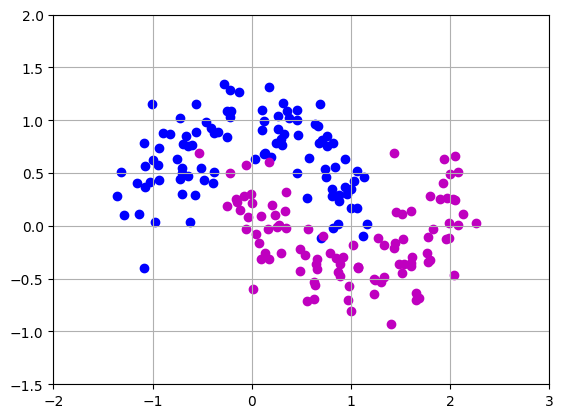

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.2, random_state=0, n_samples=200)
plt.scatter(X[y == 0,0],X[y == 0,1],color='b') # Plot blue data
plt.scatter(X[y == 1,0],X[y == 1,1],color='m') # Plot pink data
plt.axis([-2, 3, -1.5, 2])
plt.grid()
plt.show()

## SVM without Any Validation

In [2]:
model = svm.SVC(C=20).fit(X,y)
print(f"accuracy = {model.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, model.predict(X)))

accuracy = 0.97
Confusion Matrix
[[99  1]
 [ 5 95]]


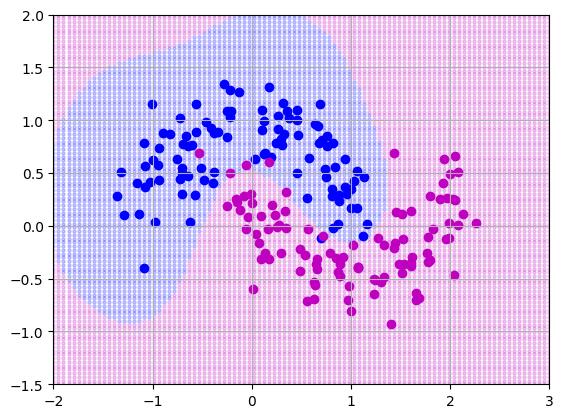

In [3]:
def visualizeRegion(ax,model):
    nx, ny = (100,100)
    xv, yv = np.meshgrid(np.linspace(ax[0],ax[1],nx), np.linspace(ax[2],ax[3],ny))
    xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
    xy = np.hstack((xv,yv))
    ypred = model.predict(xy)
    plt.scatter(xv[ypred == 0],yv[ypred == 0],
                color='b', alpha=0.2, s=5, label='_nolegend_')     # Plot blue predicted area
    plt.scatter(xv[ypred == 1],yv[ypred == 1],
                color='m', alpha=0.2, s=5, label='_nolegend_')     # Plot pink predicted area
    plt.axis(ax)
    
visualizeRegion(np.array([-2, 3, -1.5, 2]),model)
plt.scatter(X[y == 0,0],X[y == 0,1],color='b') # Plot blue data
plt.scatter(X[y == 1,0],X[y == 1,1],color='m') # Plot pink data
plt.grid()
plt.show()

## SVM with Various Cross-validation Schemes
### Holdout Validation

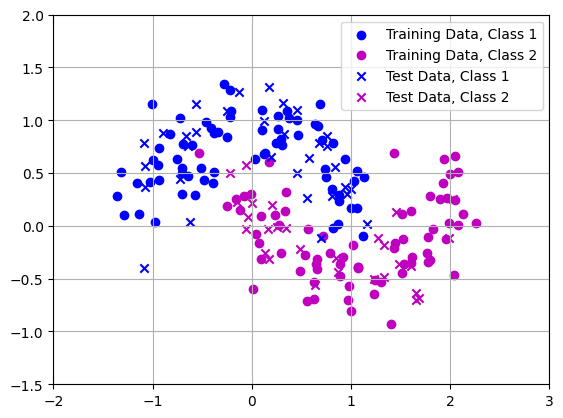

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color='b')        # Plot blue training data
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color='m')        # Plot pink training data
plt.scatter(X_test[y_test == 0,0],X_test[y_test == 0,1],color='b',marker='x') # Plot blue test data
plt.scatter(X_test[y_test == 1,0],X_test[y_test == 1,1],color='m',marker='x') # Plot pink test data
plt.legend(['Training Data, Class 1','Training Data, Class 2','Test Data, Class 1','Test Data, Class 2'])
plt.axis([-2, 3, -1.5, 2])
plt.grid()
plt.show()

In [5]:
model2 = svm.SVC(C=20).fit(X_train,y_train)
print('HOLDOUT VALIDATION RESULTS')
print(f"Training accuracy = {model2.score(X_train, y_train)}")
print('Training Confusion Matrix')
print(confusion_matrix(y_train, model2.predict(X_train)))

print(f"Testing accuracy = {model2.score(X_test, y_test)}")
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, model2.predict(X_test)))

HOLDOUT VALIDATION RESULTS
Training accuracy = 0.9785714285714285
Training Confusion Matrix
[[67  1]
 [ 2 70]]
Testing accuracy = 0.9333333333333333
Testing Confusion Matrix
[[30  2]
 [ 2 26]]


### K-fold Cross-Validation

In [6]:
print('K-FOLD CROSS-VALIDATION RESULTS')
scores = cross_val_score(model2, X=X_train, y=y_train, cv=5)
print('5-fold CV accuracies:')
print(scores.reshape(-1,1))
print('5-fold CV average accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores,ddof=1)))

K-FOLD CROSS-VALIDATION RESULTS
5-fold CV accuracies:
[[0.96428571]
 [1.        ]
 [1.        ]
 [0.96428571]
 [0.89285714]]
5-fold CV average accuracy: 0.964 +/- 0.044


### Leave-one-out Cross-Validation

In [7]:
print('LEAVE-ONE-OUT CROSS-VALIDATION RESULT')
scores = cross_val_score(model2, X=X_train, y=y_train, cv=LeaveOneOut())
print('LOOCV accuracies:')
print(scores)
print('LOOCV average accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores,ddof=1)))

LEAVE-ONE-OUT CROSS-VALIDATION RESULT
LOOCV accuracies:
[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
LOOCV average accuracy: 0.964 +/- 0.186


### Leave-2-out Cross-Validation
Warning: This code takes a long time, since it needs to train SVM 140C2 = 9,730 times.

In [8]:
#print('LEAVE-P-OUT CROSS-VALIDATION RESULT')
#scores = cross_val_score(model2, X=X_train, y=y_train, cv=LeavePOut(2))
#print('L-2-OCV accuracies:')
#print(scores)
#print('L-2-OCV average accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores,ddof=1)))

### Monte-Carlo Validation

In [9]:
print('MONTE CARLO VALIDATION RESULT')
mcv = ShuffleSplit(n_splits=5, test_size=.25, random_state=1)
mcv_accu = np.empty((mcv.n_splits,1)) 
i = 0
for train_index, test_index in mcv.split(X, y):
    x_train_fold, x_test_fold = X[train_index,:], X[test_index,:]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model2 = svm.SVC(C=20).fit(x_train_fold, y_train_fold)
    mcv_accu[i] = model2.score(x_test_fold, y_test_fold)
    i = i + 1
print('Monte Carlo CV accuracies:')
print(mcv_accu)
print('Monte Carlo CV average accuracy: %.3f +/- %.3f' % (np.mean(mcv_accu),np.std(mcv_accu,ddof=1)))

MONTE CARLO VALIDATION RESULT
Monte Carlo CV accuracies:
[[0.94]
 [0.98]
 [0.96]
 [0.96]
 [0.96]]
Monte Carlo CV average accuracy: 0.960 +/- 0.014


### Stratified K-fold Cross-Validation

In [10]:
print('STRATIFIED K-FOLD CROSS-VALIDATION RESULTS')
skf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
skf_accu = np.empty((skf.n_splits,1)) 
i = 0
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index,:], X[test_index,:]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model2 = svm.SVC(C=20).fit(x_train_fold, y_train_fold)
    skf_accu[i] = model2.score(x_test_fold, y_test_fold)
    i= i + 1
print('Stratified 5-fold CV accuracies:')
print(skf_accu)
print('Stratified 5-fold CV average accuracy: %.3f +/- %.3f' % (np.mean(skf_accu),np.std(skf_accu,ddof=1)))

STRATIFIED K-FOLD CROSS-VALIDATION RESULTS
Stratified 5-fold CV accuracies:
[[0.925]
 [0.975]
 [0.95 ]
 [1.   ]
 [0.975]]
Stratified 5-fold CV average accuracy: 0.965 +/- 0.029


### More Investigations on Holdout Validation
Visualize the decision boundary.

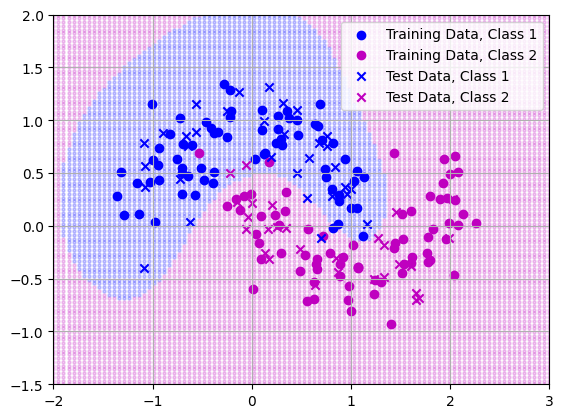

In [11]:
model2 = svm.SVC(C=20).fit(X_train,y_train)
visualizeRegion(np.array([-2, 3, -1.5, 2]),model2)
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color='b')        # Plot blue training data
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color='m')        # Plot pink training data
plt.scatter(X_test[y_test == 0,0],X_test[y_test == 0,1],color='b',marker='x') # Plot blue test data
plt.scatter(X_test[y_test == 1,0],X_test[y_test == 1,1],color='m',marker='x') # Plot pink test data
plt.legend(['Training Data, Class 1','Training Data, Class 2','Test Data, Class 1','Test Data, Class 2'])
plt.axis([-2, 3, -1.5, 2])
plt.grid()
plt.show()

Another way to visualize the decision boundary.

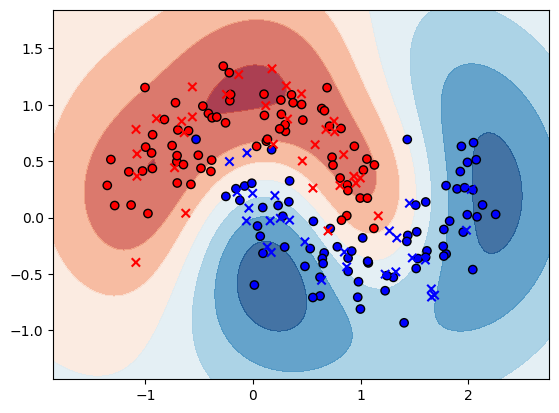

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

DecisionBoundaryDisplay.from_estimator(model2, X, cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='x')

Investigate the behavior of overfitting and underfitting by varying the RBF kernel scale.

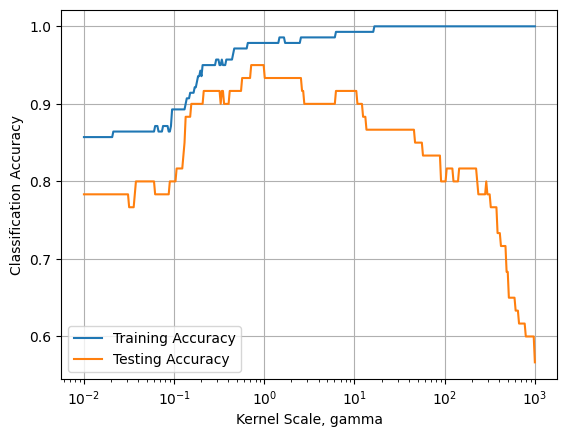

In [13]:
train_acc, test_acc = [], []
scales = np.logspace(-2,3,400)
for gi in scales:
    model = svm.SVC(C=10,kernel='rbf',gamma=gi).fit(X_train,y_train)
    train_acc.append(model.score(X_train,y_train))
    test_acc.append(model.score(X_test,y_test))

plt.semilogx(scales,train_acc)
plt.semilogx(scales,test_acc)
plt.xlabel('Kernel Scale, gamma')
plt.ylabel('Classification Accuracy')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.grid()
plt.show()

Let's check the AUC performance for 3 different SVM models.

For scale:  0.1 , AUC: 0.93
For scale:  1.0 , AUC: 0.99
For scale: 10.0 , AUC: 0.94


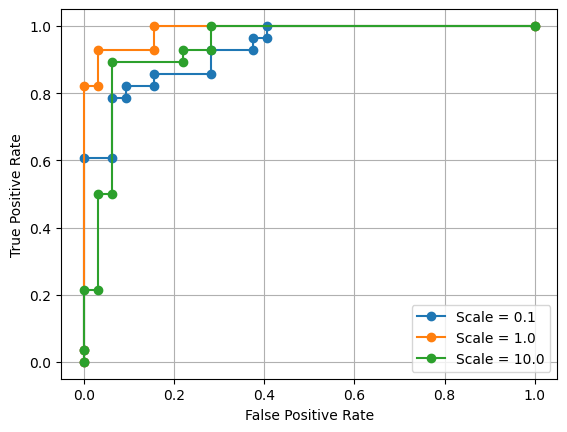

In [14]:
from sklearn import metrics

scales = np.array([0.1, 1.0, 10]) 
for gi in scales:
    model = svm.SVC(C=10,kernel='rbf',gamma=gi,probability=True).fit(X_train,y_train)
    y2 = model.predict_proba(X_test)
    print("For scale: %4.1f , AUC: %2.2f" % (gi,metrics.roc_auc_score(y_test, y2[:,1])))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y2[:,1])
    plt.plot(fpr,tpr,'-o',label=f"Scale = {gi}")
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
    